In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [39]:
# Decline curve data
t_1m = 1 #month
q_1m = 96 #stb/d

t_0m = 0 #month
q_0m = 100 #stb/d


In [40]:
b = np.log(q_0m/q_1m)/(t_1m - t_0m)

print(f'The Decline Rate b is {b} /month')
print(f'Annual Decline Rate: {(1-np.exp(-b*12))*100:.2f}%')
print(f'Half-life: {np.log(2)/b:.1f} months')


The Decline Rate b is 0.0408219945202552 /month
Annual Decline Rate: 38.73%
Half-life: 17.0 months


In [41]:
# Now using this per month decline, we can calculate the Flow Rate at the end of 1 yr.

def q_calculator_exp(month):
    return q_0m*np.exp(-month*b)

q_12m = q_calculator_exp(12)

print(f'The flowrate at the end of 12 months is: {q_12m} STB/Day')
print(f'Production decline after 1 year: {((q_0m-q_12m)/q_0m)*100:.1f}%')


The flowrate at the end of 12 months is: 61.27097573297669 STB/Day
Production decline after 1 year: 38.7%


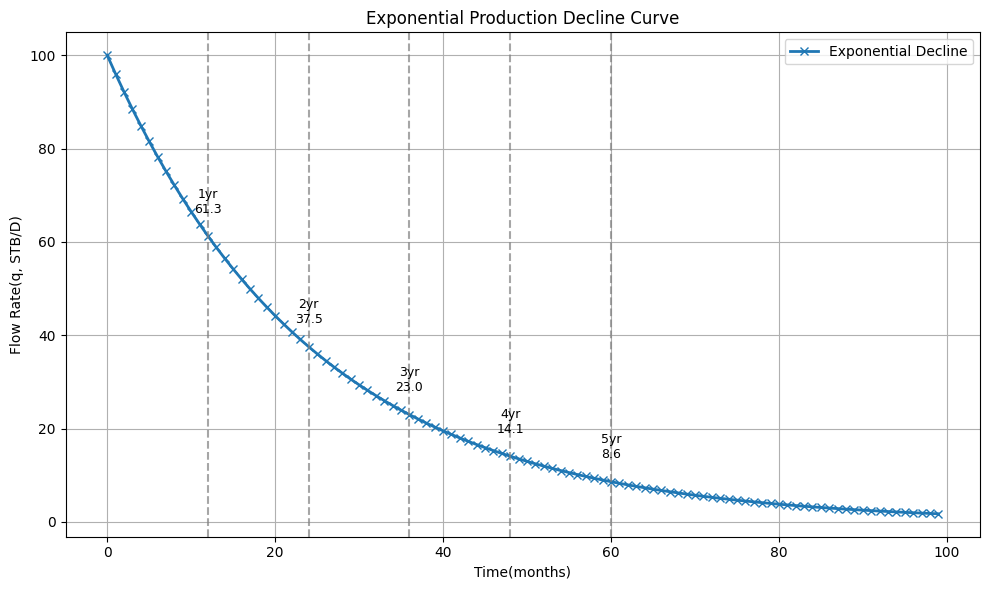

In [42]:
#Let's visualize how this flowrate v/s time looks like.

t = np.arange(0,100,1)
q = q_calculator_exp(t)

plt.figure(figsize=(10,6))
plt.plot(t, q, marker='x', linewidth=2, label='Exponential Decline')

# Add milestone markers
milestones = [12, 24, 36, 48, 60]
for month in milestones:
    q_milestone = q_calculator_exp(month)
    plt.axvline(month, linestyle='--', alpha=0.7, color='gray')
    plt.text(month, q_milestone + 5, f'{month//12}yr\n{q_milestone:.1f}', 
             ha='center', fontsize=9)

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.title('Exponential Production Decline Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [43]:
#Production rate after 11 MORE months - Means at the end of 1 Year. (1 + 11)
#At the end of 5 yrs, Total Months = 5*12

q_5yr = q_calculator_exp(60)

print(f'The flowrate at the end of 5yrs is: {q_5yr} STB/Day')
print(f'Production decline after 5 years: {((q_0m-q_5yr)/q_0m)*100:.1f}%')


The flowrate at the end of 5yrs is: 8.635231448510442 STB/Day
Production decline after 5 years: 91.4%


In [44]:
def Np_exp(t):
    Np = (q_0m - q_0m*np.exp(-b*t))/b
    return Np

Np_monthwise = Np_exp(t)

# Calculate and display cumulative production at key intervals
Np_1yr = Np_exp(12)
Np_2yr = Np_exp(24)
Np_3yr = Np_exp(36)
Np_4yr = Np_exp(48)
Np_5yr = Np_exp(60)

print(f'\nCumulative Production:')
print(f'1 year:  {Np_1yr:.0f} STB')
print(f'2 years: {Np_2yr:.0f} STB')
print(f'3 years: {Np_3yr:.0f} STB')
print(f'4 years: {Np_4yr:.0f} STB')
print(f'5 years: {Np_5yr:.0f} STB')



Cumulative Production:
1 year:  949 STB
2 years: 1530 STB
3 years: 1886 STB
4 years: 2104 STB
5 years: 2238 STB


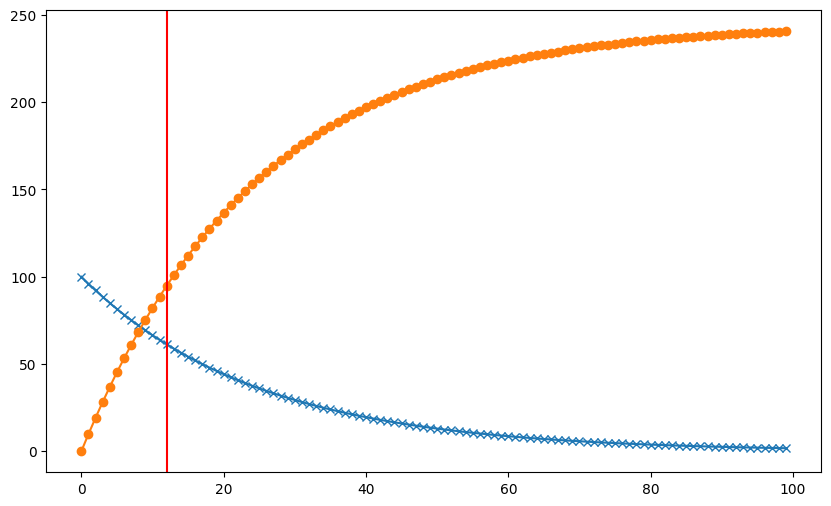

In [45]:
plt.figure(figsize=(10,6))

plt.plot(t,q,marker='x',label='Flow Rate (Exp. Decline)')
plt.plot(t,Np_monthwise/10,marker='o',label='Cumm. Prod.(x10) (Exp. Decline)')

plt.axvline(12,c='red', label='1 Year')

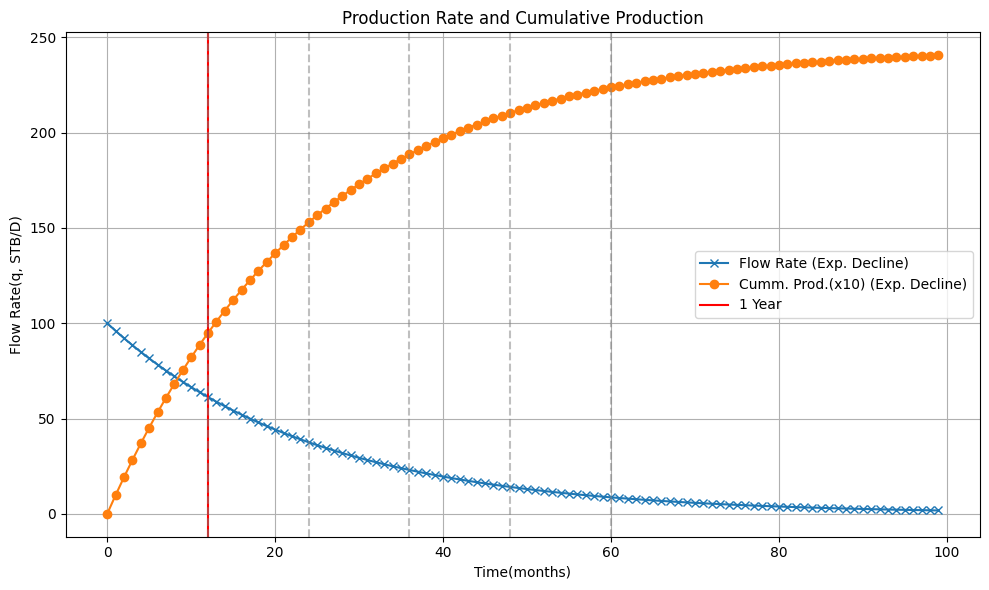

In [46]:
plt.figure(figsize=(10,6))

plt.plot(t,q,marker='x',label='Flow Rate (Exp. Decline)')
plt.plot(t,Np_monthwise/10,marker='o',label='Cumm. Prod.(x10) (Exp. Decline)')

plt.axvline(12,c='red', label='1 Year')

# Add milestone lines
for month in milestones:
    plt.axvline(month, linestyle='--', alpha=0.5, color='gray')

plt.ylabel('Flow Rate(q, STB/D)')
plt.xlabel('Time(months)')
plt.title('Production Rate and Cumulative Production')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

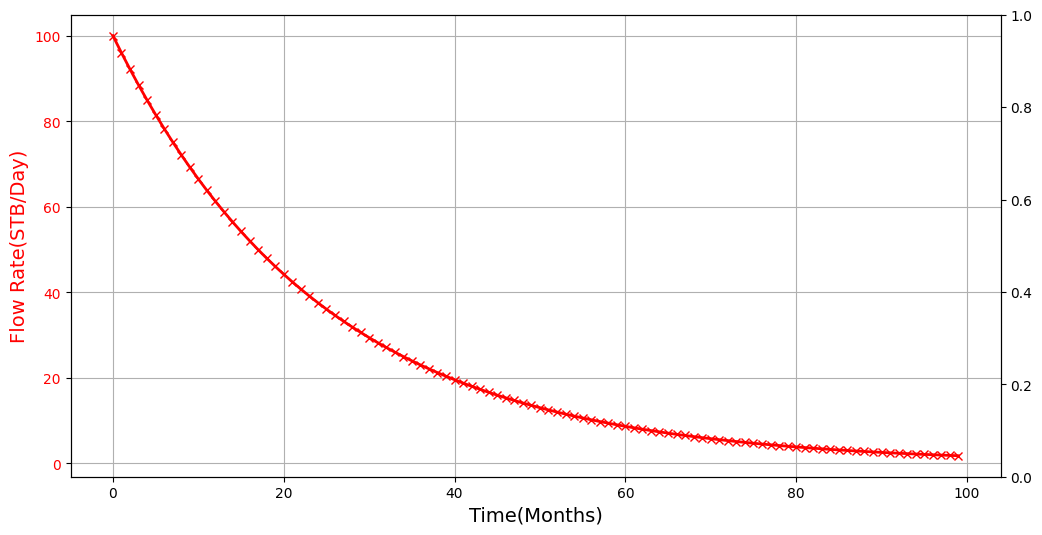

In [47]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12,6))

# make a plot
ax.plot(t,q, color="red", marker="x", linewidth=2)
# set x-axis label
ax.set_xlabel("Time(Months)",fontsize=14)
# set y-axis label
ax.set_ylabel("Flow Rate(STB/Day)",color="red",fontsize=14)
ax.tick_params(axis='y', labelcolor='red')
ax.grid()

ax2=ax.twinx()

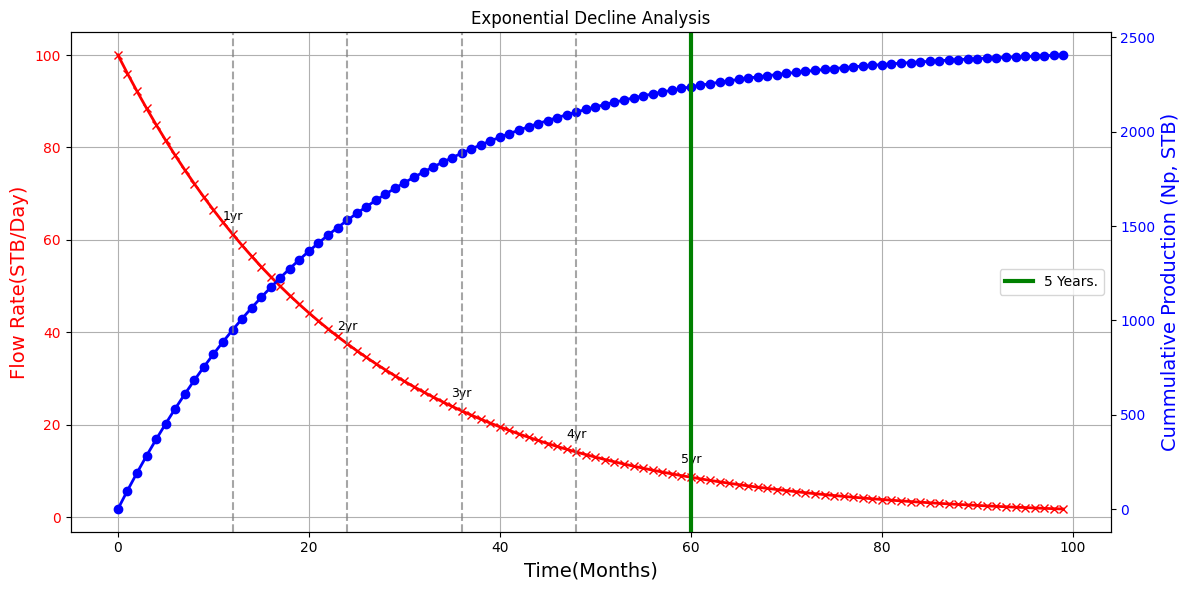

In [48]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12,6))

# make a plot
ax.plot(t,q, color="red", marker="x", linewidth=2)
# set x-axis label
ax.set_xlabel("Time(Months)",fontsize=14)
# set y-axis label
ax.set_ylabel("Flow Rate(STB/Day)",color="red",fontsize=14)
ax.tick_params(axis='y', labelcolor='red')
ax.grid()

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(t,Np_monthwise,color="blue",marker="o", linewidth=2)
ax2.set_ylabel("Cummulative Production (Np, STB)",color="blue",fontsize=14)
ax2.tick_params(axis='y', labelcolor='blue')

# Add milestone lines with values
for i, month in enumerate(milestones):
    ax2.axvline(month, color='gray', linestyle='--', alpha=0.7)
    q_val = q_calculator_exp(month)
    np_val = Np_exp(month)
    ax.text(month, q_val + 3, f'{month//12}yr', ha='center', fontsize=9)

ax2.axvline(60,color='green',lw=3,label='5 Years.')
ax2.legend(loc='center right')

plt.title('Exponential Decline Analysis')
plt.tight_layout()
plt.show()

In [49]:
# Summary statistics
print('\n' + '='*50)
print('DECLINE ANALYSIS SUMMARY')
print('='*50)
print(f'Initial Rate: {q_0m} STB/Day')
print(f'Decline Rate: {b*100:.3f}% per month')
print(f'Annual Decline: {(1-np.exp(-b*12))*100:.1f}%')
print(f'Half-life: {np.log(2)/b:.1f} months')
print(f'5-Year Rate: {q_5yr:.1f} STB/Day')
print(f'5-Year EUR: {Np_5yr:.0f} STB')
print('='*50)


DECLINE ANALYSIS SUMMARY
Initial Rate: 100 STB/Day
Decline Rate: 4.082% per month
Annual Decline: 38.7%
Half-life: 17.0 months
5-Year Rate: 8.6 STB/Day
5-Year EUR: 2238 STB
